In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Read the data
company=pd.read_csv(r'companies1.csv')

X = company.copy()
y = X.pop('status')
X.drop(columns=['Unnamed: 0'],inplace=True)


In [2]:
X.head()

,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,category_code_ecommerce,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,active_days
0,2007,1.425424,4.562309e+06,1.35741,2.0,30.427755,-9.598107,0,0,0,...,0,0,0,0,0,0,0,1,1,5110.0
1,2008,1.425424,4.562309e+06,1.00000,2.0,35.686975,-105.937799,0,0,0,...,0,0,0,0,0,0,1,0,1,4745.0
2,2007,1.000000,5.000000e+06,3.00000,14.0,37.386052,-122.083851,0,0,0,...,0,0,0,0,0,0,1,0,0,5110.0
3,2008,1.425424,4.562309e+06,1.00000,3.0,33.078655,-116.601964,0,0,0,...,0,0,0,0,0,0,1,0,1,4745.0
4,2008,1.000000,4.562309e+06,4.00000,9.0,37.441883,-122.143019,0,0,0,...,0,0,0,0,0,0,1,0,0,4745.0


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43238 entries, 0 to 43237
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   founded_at                      43238 non-null  int64  
 1   funding_rounds                  43238 non-null  float64
 2   funding_total_usd               43238 non-null  float64
 3   milestones                      43238 non-null  float64
 4   relationships                   43238 non-null  float64
 5   lat                             43238 non-null  float64
 6   lng                             43238 non-null  float64
 7   category_code_biotech           43238 non-null  int64  
 8   category_code_consulting        43238 non-null  int64  
 9   category_code_ecommerce         43238 non-null  int64  
 10  category_code_education         43238 non-null  int64  
 11  category_code_enterprise        43238 non-null  int64  
 12  category_code_games_video       

In [ ]:
X['founded_at']=X['founded_at'].astype(float)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11531 entries, 0 to 11530
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   founded_at          11531 non-null  float64
 1   first_funding_at    11531 non-null  float64
 2   last_funding_at     11531 non-null  float64
 3   funding_rounds      11531 non-null  float64
 4   funding_total_usd   11531 non-null  float64
 5   first_milestone_at  11531 non-null  float64
 6   last_milestone_at   11531 non-null  float64
 7   milestones          11531 non-null  float64
 8   relationships       11531 non-null  float64
 9   lat                 11531 non-null  float64
 10  lng                 11531 non-null  float64
 11  isClosed            11531 non-null  int64  
 12  active_days         11531 non-null  int64  
 13  other               11531 non-null  int64  
 14  government          11531 non-null  int64  
 15  photo_video         11531 non-null  int64  
 16  tran

In [4]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X,y)
print(mi_score)

[4.06990014e-02 1.94503166e-02 2.75371925e-02 1.92855758e-02
 2.21098273e-02 1.96784645e-02 1.89629388e-02 2.84590716e-03
 4.31452962e-03 3.08641877e-03 0.00000000e+00 1.42387823e-03
 5.35479929e-04 3.53466286e-03 0.00000000e+00 8.63824102e-04
 6.03437222e-04 8.97610161e-04 0.00000000e+00 1.37398713e-04
 2.42191940e-03 6.44479254e-04 0.00000000e+00 1.66669773e-03
 1.42245943e-03 0.00000000e+00 1.46732216e-03 8.60312445e-04
 0.00000000e+00 2.07036592e-03 0.00000000e+00 9.27126003e-03
 5.27834433e-03 3.14331284e-01 1.41456658e-01]


In [5]:
percen=np.percentile(mi_score,50)
print(percen)

0.0016666977332475685


In [6]:
from sklearn.feature_selection import SelectPercentile as SP
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as DTC
import numpy as np

X_train_1,X_test_1,y_train,y_test = tts(
    X,y
    ,random_state=0
    ,stratify=y
)

model_1 = DTC().fit(X_train_1,y_train)
score_1 = model_1.score(X_test_1,y_test)
print(f"score_1:{score_1}")

score_1:0.9857539315448659


In [7]:
# for i in range(3):
mi_score_selected_index = np.where(mi_score >=percen)[0]
X_2 = X.iloc[:,mi_score_selected_index]
X_train_2,X_test_2,y_train,y_test = tts(
    X_2,y
    ,random_state=0
    ,stratify=y
)
model_2 = DTC().fit(X_train_2,y_train)
score_2 = model_2.score(X_test_2,y_test)
print(f"score_2:{score_2}")

score_2:0.9868640148011101


In [8]:
X_2.head()

,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,category_code_ecommerce,category_code_hardware,category_code_web,country_code_DEU,country_code_ISR,country_code_USA,country_code_other,isClosed,active_days
0,2007,1.425424,4.562309e+06,1.35741,2.0,30.427755,-9.598107,0,0,0,0,0,0,0,0,1,1,5110.0
1,2008,1.425424,4.562309e+06,1.00000,2.0,35.686975,-105.937799,0,0,0,0,0,0,0,1,0,1,4745.0
2,2007,1.000000,5.000000e+06,3.00000,14.0,37.386052,-122.083851,0,0,0,0,1,0,0,1,0,0,5110.0
3,2008,1.425424,4.562309e+06,1.00000,3.0,33.078655,-116.601964,0,0,0,0,0,0,0,1,0,1,4745.0
4,2008,1.000000,4.562309e+06,4.00000,9.0,37.441883,-122.143019,0,0,0,0,0,0,0,1,0,0,4745.0


In [9]:
from imblearn.over_sampling import SMOTE

smot=SMOTE(sampling_strategy='minority')
X_s,y_s = smot.fit_resample(X_2,y)

In [10]:
X_s.head()

,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,category_code_ecommerce,category_code_hardware,category_code_web,country_code_DEU,country_code_ISR,country_code_USA,country_code_other,isClosed,active_days
0,2007,1.425424,4.562309e+06,1.35741,2.0,30.427755,-9.598107,0,0,0,0,0,0,0,0,1,1,5110.0
1,2008,1.425424,4.562309e+06,1.00000,2.0,35.686975,-105.937799,0,0,0,0,0,0,0,1,0,1,4745.0
2,2007,1.000000,5.000000e+06,3.00000,14.0,37.386052,-122.083851,0,0,0,0,1,0,0,1,0,0,5110.0
3,2008,1.425424,4.562309e+06,1.00000,3.0,33.078655,-116.601964,0,0,0,0,0,0,0,1,0,1,4745.0
4,2008,1.000000,4.562309e+06,4.00000,9.0,37.441883,-122.143019,0,0,0,0,0,0,0,1,0,0,4745.0


In [11]:
X_train_s,X_test_s,y_train_s,y_test_s = tts(
    X_s,y_s
    ,random_state=0
    ,stratify=y_s
)

model_s = DTC().fit(X_train_s,y_train_s)
score_s = model_s.score(X_test_s,y_test_s)
print(f"score_s:{score_s}")

score_s:0.9878084606345476


In [12]:
#standardize

# X_scaled = (X_s- X_s.mean(axis=0)) / X_s.std(axis=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled=scaler.fit_transform(X_s)

In [13]:
#PCA
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-2.589217,1.877739,0.209632,0.220476,-0.744280,-0.160441,-0.376802,-0.362721,-0.985119,0.233008,0.151219,-0.774531,-0.446973,-0.843977,1.348944,-0.660810,-0.654487,-0.003213
1,-0.266206,-1.310094,-0.348090,-0.256363,-0.431885,-0.202861,-0.014050,-0.020305,0.051734,-0.062870,-0.469594,0.079063,-0.499244,-0.238650,0.399510,0.347806,-0.015276,-0.003091
2,-0.116735,-2.251767,0.009275,3.758426,1.304663,2.433486,-0.071907,-0.528472,-0.321971,-0.959123,2.633499,0.217864,0.504255,1.146974,-0.291113,-1.108774,-0.222344,-0.115885
3,-0.219394,-1.364381,-0.354306,-0.213534,-0.562723,-0.203254,0.006478,-0.026588,0.066129,-0.066607,-0.460267,0.218072,-0.523886,-0.250888,0.453338,0.335479,-0.177030,-0.003176
4,0.669087,-1.604580,0.397508,2.506761,0.764502,0.845933,0.752419,0.266473,0.151250,0.076176,3.511368,-0.420945,-1.918264,0.666589,-0.773506,-1.634662,-0.226479,-0.113171


In [14]:
companies = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of companies
    columns=component_names,  # so the columns are the principal components
    index=X_s.columns,  # and the rows are the original features
)
companies

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
founded_at,-0.450875,-0.383833,0.202112,0.137474,-0.024001,-0.173739,-0.020277,0.025744,0.031545,0.176414,-0.086483,-0.046338,-0.127498,0.019539,-0.030235,0.010168,0.004635,-0.705960
funding_rounds,0.045283,-0.045571,0.601691,-0.229018,-0.054530,0.060580,-0.041413,0.026406,-0.061673,-0.285832,-0.039112,0.062045,0.166248,-0.628889,-0.218703,0.099596,-0.023622,0.002368
funding_total_usd,0.107378,0.012825,0.607434,-0.263664,-0.034552,0.088005,-0.029117,-0.007763,-0.031291,-0.131224,-0.018333,-0.009588,-0.003906,0.630203,0.349396,-0.040474,0.021175,-0.001497
milestones,0.298548,0.161483,0.319416,0.391479,0.062590,-0.152499,0.006227,-0.013210,0.065101,0.214142,0.076882,-0.025846,-0.096018,0.057114,-0.397127,-0.612334,-0.017484,-0.000354
relationships,0.261404,0.159045,0.237810,0.436280,0.061278,-0.247438,-0.007435,-0.012015,0.113546,0.352521,0.118693,0.026541,0.163123,-0.099778,0.290910,0.564643,0.048220,-0.001143
lat,0.108382,-0.124253,-0.014745,-0.161027,0.614563,-0.078041,-0.094541,0.016386,-0.050959,0.028435,-0.061691,-0.705251,0.142160,-0.016270,-0.045025,0.017685,0.162108,0.000183
lng,-0.375350,0.476157,0.075385,-0.012525,0.019323,0.073260,-0.005093,0.015322,-0.011063,0.019799,0.031453,0.050784,-0.014136,0.080731,-0.228593,0.101662,0.739700,0.000163
category_code_biotech,-0.007049,-0.104623,0.033066,-0.355821,-0.040387,0.335030,0.162279,-0.158172,-0.164900,0.720624,0.185804,0.087182,0.307788,-0.024313,-0.089032,-0.061872,-0.019472,0.000813
category_code_consulting,-0.068532,-0.031020,-0.076880,-0.197064,-0.117319,-0.235223,-0.653695,0.226472,0.341862,0.019269,0.407803,0.058885,0.316412,0.059992,-0.048465,-0.093056,-0.012615,0.000598
category_code_ecommerce,-0.134792,-0.006526,-0.032781,-0.075599,-0.034351,-0.462139,0.611325,-0.162673,0.150472,-0.227439,0.208722,-0.013384,0.472243,0.098544,-0.041246,-0.086152,-0.010145,0.000035


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.feature_selection import mutual_info_classif as MIC


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = MIC(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

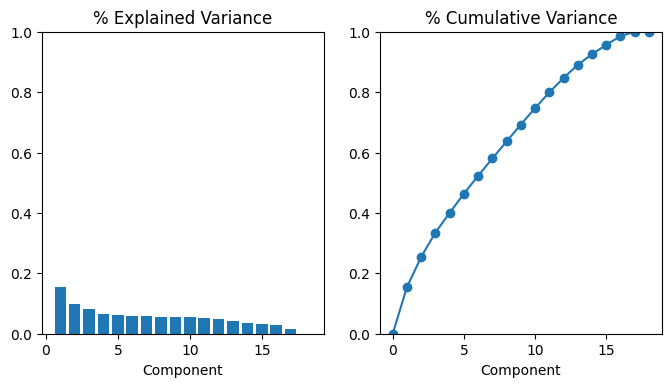

In [16]:
plot_variance(pca);

In [17]:
mi_scores = make_mi_scores(X_pca, y_s, discrete_features=False)
mi_scores

PC8     0.438726
PC11    0.436120
PC18    0.415969
PC1     0.316823
PC7     0.290882
PC13    0.248830
PC2     0.245014
PC6     0.216672
PC9     0.196197
PC5     0.150659
PC12    0.120836
PC14    0.114186
PC10    0.113467
PC4     0.111987
PC16    0.075763
PC17    0.073938
PC15    0.058441
PC3     0.056365
Name: MI Scores, dtype: float64

In [18]:
# idx = X_pca["PC5"].sort_values(ascending=False).index
# X_s.loc[idx, X_s.columns]

In [19]:
# sns.scatterplot(x="last_funding_at", y='isClosed', data=X_s);

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train_pca,X_test_pca,y_train_s,y_test_s = tts(
    X_pca,y_s
    ,random_state=0
    ,stratify=y_s
)

clf = LogisticRegression(random_state=22)
clf.fit(X_train_pca, y_train_s)
y_pred = clf.predict(X_test_pca)

accuracy_score(y_pred, y_test_s)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9245495495495496

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       696
           1       1.00      1.00      1.00       296
           2       0.91      0.93      0.92      9571
           3       0.93      0.91      0.92      9861

    accuracy                           0.92     20424
   macro avg       0.96      0.96      0.96     20424
weighted avg       0.92      0.92      0.92     20424



In [28]:
from sklearn.svm import SVC

X_train_svc,X_test_svc,y_train_svc,y_test_svc = tts(
    X_pca,y_s
    ,random_state=0
    ,stratify=y_s
)
svm = SVC(gamma='auto')
svm.fit(X_train_svc, y_train_svc)   
y_pred = svm.predict(X_test_svc)

accuracy_score(y_pred, y_test_svc)

0.9412945554249902

In [29]:
print(classification_report(y_pred, y_test_svc))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       719
           1       0.89      0.97      0.93       273
           2       0.96      0.93      0.94     10034
           3       0.92      0.96      0.94      9398

    accuracy                           0.94     20424
   macro avg       0.94      0.95      0.94     20424
weighted avg       0.94      0.94      0.94     20424

